In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
diabetes_Y = sklearn.datasets.load_diabetes()
diabetes_X = diabetes_Y.data[:, np.newaxis, 2]

In [3]:
diabetes_X_train = diabetes_X[:60]
diabetes_X_test = diabetes_X[-50:]
diabetes_Y_train = diabetes_Y.target[:60]  # match the accout of x_train
diabetes_Y_test = diabetes_Y.target[-50:]

In [4]:
xx = np.linspace(-0.1, 0.15, 100)

In [23]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train = poly.fit_transform(diabetes_X_train)
x_test = poly.transform(diabetes_X_test)

In [24]:
poly.get_feature_names(diabetes_Y.feature_names)

['1', 'age', 'age^2']

In [25]:
diabetes_Y.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [26]:
regressor_poly = LinearRegression()
regressor_poly.fit(x_train, diabetes_Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
xx_poly = poly.transform(xx.reshape(xx.shape[0], 1))

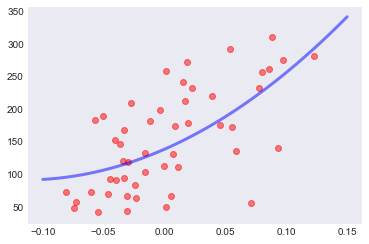

In [28]:
plt.style.use('seaborn-dark')
plt.plot(xx, regressor_poly.predict(xx_poly), color='blue', alpha=0.5, linewidth=3)
plt.scatter(diabetes_X_test, diabetes_Y_test, color='red', alpha=0.5)
plt.show()

In [29]:
regressor_poly.coef_

array([   0.        ,  821.25664442, 3567.97614596])

In [30]:
[*zip(poly.get_feature_names(diabetes_Y.feature_names),regressor_poly.coef_)]

[('1', 0.0), ('age', 821.2566444208078), ('age^2', 3567.976145958466)]

In [31]:
coeff=pd.DataFrame([poly.get_feature_names(diabetes_Y.feature_names),regressor_poly.coef_.tolist()]).T

In [32]:
coeff.head()

,0,1
0,1,0
1,age,821.257
2,age^2,3567.98


In [33]:
coeff.columns = ["feature","coef"]

In [34]:
coeff

,feature,coef
0,1,0
1,age,821.257
2,age^2,3567.98


In [35]:
coeff.sort_values(by="coef")

,feature,coef
0,1,0
1,age,821.257
2,age^2,3567.98
